In [1]:
import pandas as pd

# Load the data
materials = pd.read_csv('./data/Courses and Learning Material.csv')
lpi = pd.read_csv('./data/Leaning Pathway Index.csv')

# Display the first few rows of the dataset
materials.head()

,Tab name,Source,Course Level,Duration,Prerequisites,Prework,Course / Learning material,Course / Learning material Link,Type (Free or Paid)
0,CLMML00,Google Developers,Beginners,70 mins,No,No,Introduction to Machine Learning,https://developers.google.com/machine-learning...,Free
1,CLMML01,Google Developers,Beginners to Intermediate,NaN,"Yes, a handful",Yes,Machine Learning Crash Course (Foundation),https://developers.google.com/machine-learning...,Free
2,CLMML02,Google Developers,Beginners to Intermediate,45 mins,No,No,Problem Framing (ML related),https://developers.google.com/machine-learning...,Free
3,CLMML03,Google Developers,Beginners to Intermediate,NaN,No,No,Data Preparation and Feature Engineering in ML,https://developers.google.com/machine-learning...,Free
4,CLMML04,Google Developers,Beginners to Intermediate,NaN,Yes,No,Testing and Debugging,https://developers.google.com/machine-learning...,Free


In [2]:
lpi.head(5)

,Course / Learning material,Source,Course Level,Type (Free or Paid),Module,Duration,Module / Sub-module \nDifficulty level,Keywords / Tags / Skills / Interests / Categories,Links
0,Introduction to Machine Learning,Google Developers,Beginners,Free,Introduction to Machine Learning,20 mins,Easy,machine learning,https://developers.google.com/machine-learning...
1,Introduction to Machine Learning,Google Developers,Beginners,Free,What is Machine Learning,20 mins,Easy,machine learning,https://developers.google.com/machine-learning...
2,Introduction to Machine Learning,Google Developers,Beginners,Free,Supervised Learning,20 mins,Easy to Medium,supervised learning,https://developers.google.com/machine-learning...
3,Introduction to Machine Learning,Google Developers,Beginners,Free,Test your understanding,10 mins,Easy,machine learning test,https://developers.google.com/machine-learning...
4,Machine Learning Crash Course (Foundation),Google Developers,Beginners to Intermediate,Free,Introduction to ML,3 mins,Easy,machine learning,https://developers.google.com/machine-learning...


# Cleaning up the Duration col

In [3]:
lpi.Duration.value_counts()

Duration
1 min          121
2 minutes      113
5 min           91
2 min           63
1 minute        61
              ... 
1mins            1
4:34mins         1
2hrs             1
24 secs          1
90 miniutes      1
Name: count, Length: 185, dtype: int64

In [4]:
import pandas as pd
import re
import numpy as np

# Function to extract string units
def extract_unit(text):
    if isinstance(text, str):  # Check if the input is a string
        # Extract the unit (min, hour, sec, etc.)
        unit = re.search(r'[a-zA-Z]+', text).group().lower()
        return unit
    else:
        return None  # Return None if the input is not a string

# Apply the function to create a new column for units
lpi['Unit'] = lpi['Duration'].apply(extract_unit)

# Count the occurrences of each distinct unit
unit_counts = lpi['Unit'].value_counts()

print(unit_counts)

Unit
min         594
minutes     518
mins        115
minute       61
hours        19
secs          4
to            3
minutess      1
miinutes      1
hr            1
mnis          1
sec           1
hrs           1
miniutes      1
Name: count, dtype: int64


In [5]:
lpi.query('Unit.str.contains("miinutes|to|mnis|miniutes|sec|hrs", case=False, na=False)').head(20)

,Course / Learning material,Source,Course Level,Type (Free or Paid),Module,Duration,Module / Sub-module \nDifficulty level,Keywords / Tags / Skills / Interests / Categories,Links,Unit
405,Data Engineer - Serverless Data Processing wit...,Google Cloud Skill Boost,Intermediate,Free during mentorship period,Beam Portability: Quiz - Beam Portability,5 miinutes,Easy to Medium,"Cloud, Dataflow, Severless, Data Processing, D...",https://www.cloudskillsboost.google/course_ses...,miinutes
425,Data Engineer - Serverless Data Processing wit...,Google Cloud Skill Boost,Intermediate,Free during mentorship period,Serverless Data Processing with Dataflow: Deve...,35 to 36 hours,Medium to Hard,"Cloud, Dataflow, Severless, Data Processing, D...",https://www.cloudskillsboost.google/course_tem...,to
510,Data Engineer - Quest: Perform Foundational Da...,Google Cloud Skill Boost,Beginner,Free during mentorship period,"Perform Foundational Data, ML, and AI Tasks in...",7 to 8 hours,Easy to Medium,"Machine Learning/Deployment/Cloud, Lab, AI, ta...",https://www.cloudskillsboost.google/course_tem...,to
532,Data Engineer - Quest: Engineer Data in Google...,Google Cloud Skill Boost,Beginner,Free during mentorship period,Engineer Data in Google Cloud,5 to 6 hours,Easy to Medium,"data engineer, data preparation, data wranglin...",https://www.cloudskillsboost.google/course_tem...,to
574,Testing and Debugging,Google Developers,Beginner to Intermediate,Free,Testing in production: Check Your Understanding:,5 mnis,Medium,"data, behavior, model, quality, dataset, predi...",https://developers.google.com/machine-learning...,mnis
662,Data Engineer - Preparing for the Google Cloud...,Google Cloud Skill Boost,Beginner,Free during mentorship period,Building and Operationalizing Data Processing ...,19sec,Medium,"data, SQL, bigquery, apache airflow, pipeline,...",https://www.cloudskillsboost.google/course_ses...,sec
668,Data Engineer - Preparing for the Google Cloud...,Google Cloud Skill Boost,Beginner,Free during mentorship period,Operationalizing Machine Learning Models: Mach...,33secs,Medium,"data, machine learning, bigquery, dataflow, te...",https://www.cloudskillsboost.google/course_ses...,secs
681,Data Engineer - Preparing for the Google Cloud...,Google Cloud Skill Boost,Beginner,Free during mentorship period,Operationalizing Machine Learning Models: Pric...,43 secs,Medium,"data, bigquery, query validator, pricing calcu...",https://www.cloudskillsboost.google/course_ses...,secs
684,Data Engineer - Preparing for the Google Cloud...,Google Cloud Skill Boost,Beginner,Free during mentorship period,Operationalizing Machine Learning Models: Chal...,24 secs,Medium,"data, bigtable, cloud storage, bigquery, SQL, ...",https://www.cloudskillsboost.google/course_ses...,secs
685,Data Engineer - Preparing for the Google Cloud...,Google Cloud Skill Boost,Beginner,Free during mentorship period,Operationalizing Machine Learning Models: PDE ...,2hrs,Medium,"data, bigtable, cloud storage, bigquery, SQL, ...",https://www.cloudskillsboost.google/course_ses...,hrs


In [6]:
# Function to convert all durations to minutes
def convert_to_minutes(text):
    if isinstance(text, str):  # Check if the input is a string
        # Extract the numerical value
        num = float(re.search(r'\d+', text).group())
        # Extract the unit (min, hour, sec, etc.)
        unit = re.search(r'[a-zA-Z]+', text).group().lower()
        
        # Minutes
        if 'min' in unit or 'minute' in unit or 'miinutes' in unit or 'minutess' in unit or 'mnis' in unit:
            return num
        # Hours
        elif 'hr' in unit or 'hours' in unit or 'hrs' in unit:
            return num * 60
        # Seconds
        elif 'sec' in unit or 'secs' in unit:
            return num / 60
        # Special case for 'to',
        # Extract only the first digit before 'to'
        if ' to ' in text:
            return (float(re.search(r'\d+', text).group()) ) * 60
        # Other units
        else:
            return None  # Handle other cases if needed
    else:
        return None  # Return None if the input is not a string

In [7]:
# Apply the function to create a new column
lpi['Duration_in_minutes'] = lpi['Duration'].apply(convert_to_minutes).round(2)


In [8]:
lpi.query('Unit.str.contains("miinutes|to|mnis|miniutes|sec|hrs", case=False, na=False)')[["Duration", "Unit", "Duration_in_minutes"]]

,Duration,Unit,Duration_in_minutes
405,5 miinutes,miinutes,5.00
425,35 to 36 hours,to,2100.00
510,7 to 8 hours,to,420.00
532,5 to 6 hours,to,300.00
574,5 mnis,mnis,5.00
662,19sec,sec,0.32
668,33secs,secs,0.55
681,43 secs,secs,0.72
684,24 secs,secs,0.40
685,2hrs,hrs,120.00


# Visualization

In [9]:
import plotly.express as px

fig = px.histogram(lpi, x="Duration_in_minutes", nbins=100, title="Distribution of Duration in Minutes")
fig.show()


In [10]:
fig = px.box(lpi, y="Duration_in_minutes", title="Box Plot of Duration in Minutes")
fig.show()


# Take away the outliners

In [11]:
# Calculate IQR
Q1 = lpi['Duration_in_minutes'].quantile(0.25)
Q3 = lpi['Duration_in_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_df = lpi[(lpi['Duration_in_minutes'] >= lower_bound) & (lpi['Duration_in_minutes'] <= upper_bound)]

# Create the box plot
fig = px.box(filtered_df, y="Duration_in_minutes", title="Box Plot of Duration in Minutes (Outliers Removed)")
fig.show()

In [12]:
lpi["Course Level"].value_counts()

Course Level
Intermediate to Advanced     899
Beginner                     244
Intermediate                  99
Beginners to Intermediate     97
Beginner to Intermediate      39
Beginners                      4
Name: count, dtype: int64

In [13]:
level_dict = {"Beginners":"Beginner","Beginners to Intermediate":"Beginner to Intermediate"}
filtered_df["Course Level"] = filtered_df["Course Level"].replace(level_dict)
filtered_df["Course Level"].value_counts()

/var/folders/r5/wq0wq8mx0d56rbrbs38jt94w0000gn/T/ipykernel_31280/2732463634.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Course Level
Intermediate to Advanced    726
Beginner                    212
Intermediate                 75
Beginner to Intermediate     63
Name: count, dtype: int64

In [14]:
# Create the box plot
fig = px.box(filtered_df, x="Course Level", y="Duration_in_minutes", title="Box Plot of Duration in Minutes (Outliers Removed)")
fig.show()

# Is the difference between Beginner & Intermediate statistically valid?

In [126]:
def AB_Test(dataframe, group, target):
    
    # Packages
    from scipy.stats import shapiro
    import scipy.stats as stats
    
    # Split A/B
    groupA = dataframe[dataframe[group] == 1][target]
    groupB = dataframe[dataframe[group] == 0][target]
    
    # Assumption: Normality
    ntA = shapiro(groupA)[1] < 0.05
    ntB = shapiro(groupB)[1] < 0.05
    # H0: Distribution is Normal! - False
    # H1: Distribution is not Normal! - True
    
    if (ntA == False) & (ntB == False): # If both groups pass the normality test
        # (i.e., both groups have a normal distribution), then the following nested logic checks for the homogeneity of variances

        # Parametric Test
        # Assumption: Homogeneity of variances
        # The Levene test checks if variances are equal across groups. If the p-value is less than 0.05,
        # it suggests that the variances are not equal.
        leveneTest = stats.levene(groupA, groupB)[1] < 0.05
        # H0: Homogeneity: False
        # H1: Heterogeneous: True

        if leveneTest == False:
            # Homogeneity
            ttest = stats.ttest_ind(groupA, groupB, equal_var=True)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
        else:
            # Heterogeneous
            ttest = stats.ttest_ind(groupA, groupB, equal_var=False)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
    else:
        # Non-Parametric Test
        ttest = stats.mannwhitneyu(groupA, groupB)[1] 
        # H0: M1 == M2 - False
        # H1: M1 != M2 - True

    # Result
    temp = pd.DataFrame({
        "AB Hypothesis":[ttest < 0.05], 
        "p-value":[round(ttest, 4)]
    })
    temp["Parametric"] = np.where((ntA == False) & (ntB == False), "True", "False")
    temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False, "Reject H1", "Reject H0")
    temp["Comment"] = np.where(temp["AB Hypothesis"] == "Reject H1", "A/B groups are statistically similar.", "A/B groups are not similar!")
    temp["Feature"] = group
    temp["GroupA_mean"] = groupA.mean()
    temp["GroupB_mean"] = groupB.mean()
    temp["GroupA_median"] = groupA.median()
    temp["GroupB_median"] = groupB.median()

    # Columns
    if (ntA == False) & (ntB == False):
        temp["Homogeneity"] = np.where(leveneTest == False, "Yes", "No")
        temp = temp[["Parametric", "Homogeneity","AB Hypothesis", "p-value", "Comment", "GroupA_mean", "GroupB_mean", "GroupA_median", "GroupB_median"]]
    else:
        temp = temp[["Parametric","AB Hypothesis", "p-value", "Comment", "GroupA_mean", "GroupB_mean", "GroupA_median", "GroupB_median"]]

    # Print Hypothesis
    # print("# A/B Testing Hypothesis")
    # print("H0: A == B")
    # print("H1: A != B", "\n")

    return temp

# Get unique course levels
unique_course_levels = filtered_df['Course Level'].unique()

# Initialize an empty list to store results
ab_results = []

# Loop through each unique pair of course levels
for i in range(len(unique_course_levels)):
    for j in range(i + 1, len(unique_course_levels)):
        level1 = unique_course_levels[i]
        level2 = unique_course_levels[j]

        # Create a temporary DataFrame containing only the two levels
        temp_df = filtered_df[filtered_df['Course Level'].isin([level1, level2])].copy()

        # Create a binary group column for the A/B test
        temp_df['group'] = np.where(temp_df['Course Level'] == level1, 1, 0)


        # Apply the A/B test
        result = AB_Test(temp_df, 'group', 'Duration_in_minutes')

        # Add metadata to the result
        result['Result'] = f"'{level1}' vs '{level2}'"

        # Append the result to the list
        ab_results.append(result)

# Concatenate all results into a single DataFrame
final_results = pd.concat(ab_results, ignore_index=True)
final_results["Result"] = final_results.apply(lambda row: f"{row['Result']} {' '.join(row['Comment'].split()[-3:])}", axis=1)

final_results

,Parametric,AB Hypothesis,p-value,Comment,GroupA_mean,GroupB_mean,GroupA_median,GroupB_median,Result
0,False,Reject H0,0.0022,A/B groups are not similar!,6.911415,8.603175,4.0,5.0,'Beginner' vs 'Beginner to Intermediate' are n...
1,False,Reject H1,0.0696,A/B groups are statistically similar.,6.911415,5.531680,4.0,4.0,'Beginner' vs 'Intermediate to Advanced' are s...
2,False,Reject H0,0.0005,A/B groups are not similar!,6.911415,3.840000,4.0,2.0,'Beginner' vs 'Intermediate' are not similar!
3,False,Reject H0,0.0000,A/B groups are not similar!,8.603175,5.531680,5.0,4.0,'Beginner to Intermediate' vs 'Intermediate to...
4,False,Reject H0,0.0000,A/B groups are not similar!,8.603175,3.840000,5.0,2.0,'Beginner to Intermediate' vs 'Intermediate' a...
5,False,Reject H0,0.0028,A/B groups are not similar!,5.531680,3.840000,4.0,2.0,'Intermediate to Advanced' vs 'Intermediate' a...


In [127]:
for i in final_results.Result:
    print(i)

'Beginner' vs 'Beginner to Intermediate' are not similar!
'Beginner' vs 'Intermediate to Advanced' are statistically similar.
'Beginner' vs 'Intermediate' are not similar!
'Beginner to Intermediate' vs 'Intermediate to Advanced' are not similar!
'Beginner to Intermediate' vs 'Intermediate' are not similar!
'Intermediate to Advanced' vs 'Intermediate' are not similar!


### In-Depth Insights:

1. **'Beginner' vs 'Beginner to Intermediate'**:
    - **Insight**: These two groups are not similar in terms of course duration.
    - **Reason**: It's likely that courses labeled as 'Beginner to Intermediate' are designed to cover more ground, hence they are longer on average compared to purely 'Beginner' courses.

2. **'Beginner' vs 'Intermediate to Advanced'**:
    - **Insight**: These two groups are statistically similar in terms of course duration.
    - **Reason**: This is intriguing and could suggest the advanced courses are trying to keep the content short and into bite size, so that learners can digest it easily. It seems a different approach from 'Beginner to Intermediate' which tries to cover more ground.

3. **'Beginner' vs 'Intermediate'**:
    - **Insight**: These groups are not similar.
    - **Reason**: 'Intermediate' courses are generally shorter, possibly because they assume prior knowledge and jump straight into the core topics.

4. **'Beginner to Intermediate' vs 'Intermediate to Advanced'**:
    - **Insight**: These groups are not similar.
    - **Reason**: 'Beginner to Intermediate' courses are likely longer because they aim to bridge the gap between beginner and intermediate levels, requiring more time.

5. **'Beginner to Intermediate' vs 'Intermediate'**:
    - **Insight**: These groups are not similar.
    - **Reason**: 'Beginner to Intermediate' courses are longer, possibly because they cover foundational topics in addition to intermediate ones.

6. **'Intermediate to Advanced' vs 'Intermediate'**:
    - **Insight**: These groups are not similar.
    - **Reason**: 'Intermediate to Advanced' courses are longer, likely because they cover more advanced topics that require additional time for mastery.

### Summary:
- Courses that aim to bridge skill levels ('Beginner to Intermediate', 'Intermediate to Advanced') tend to be longer, possibly due to the broader range of topics they cover.
- Purely 'Intermediate' courses are generally shorter, possibly because they are more focused and assume some level of prior knowledge.



# By Course providers

In [81]:
# Create the box plot
fig = px.box(filtered_df, x="Source", y="Duration_in_minutes", title="Box Plot of Duration in Minutes (Outliers Removed)")
fig.show()

# By Course keywords

In [38]:
filtered_df[["Keywords / Tags / Skills / Interests / Categories", "Duration_in_minutes"]].sample(3)

,Keywords / Tags / Skills / Interests / Categories,Duration_in_minutes
1264,Reinforcement Learning,5.0
1273,Reinforcement Learning,1.0
484,"Cloud, Dataflow, Severless, Data Processing, D...",4.0


In [39]:
keyword = pd.DataFrame(filtered_df)


In [40]:
keyword["Keywords / Tags / Skills / Interests / Categories"].value_counts()

Keywords / Tags / Skills / Interests / Categories
Autoencoders, Model Initialization, Dropout Techniques, Attention Mechanisms, Super-resolution                                                                                                                                                 48
Machine learning/Cloud, ML Pipeline, TensorFlow, Pipeline, tfx                                                                                                                                                                                 17
ML System/Training/Prediction/Keras                                                                                                                                                                                                            16
ML system/Data distribution/System failure/ Data validation/Tensorflow                                                                                                                                                          

In [41]:
keyword.rename(columns={"Keywords / Tags / Skills / Interests / Categories":"Keywords"}, inplace=True)
keyword.head()

,Course / Learning material,Source,Course Level,Type (Free or Paid),Module,Duration,Module / Sub-module \nDifficulty level,Keywords,Links,Unit,Duration_in_minutes
0,Introduction to Machine Learning,Google Developers,Beginner,Free,Introduction to Machine Learning,20 mins,Easy,machine learning,https://developers.google.com/machine-learning...,mins,20.0
1,Introduction to Machine Learning,Google Developers,Beginner,Free,What is Machine Learning,20 mins,Easy,machine learning,https://developers.google.com/machine-learning...,mins,20.0
2,Introduction to Machine Learning,Google Developers,Beginner,Free,Supervised Learning,20 mins,Easy to Medium,supervised learning,https://developers.google.com/machine-learning...,mins,20.0
3,Introduction to Machine Learning,Google Developers,Beginner,Free,Test your understanding,10 mins,Easy,machine learning test,https://developers.google.com/machine-learning...,mins,10.0
4,Machine Learning Crash Course (Foundation),Google Developers,Beginner to Intermediate,Free,Introduction to ML,3 mins,Easy,machine learning,https://developers.google.com/machine-learning...,mins,3.0


In [42]:
keyword.query("Keywords.str.contains('/', regex=False)").head(2)

,Course / Learning material,Source,Course Level,Type (Free or Paid),Module,Duration,Module / Sub-module \nDifficulty level,Keywords,Links,Unit,Duration_in_minutes
513,Data Engineer - Quest: Perform Foundational Da...,Google Cloud Skill Boost,Beginner,Free during mentorship period,"Perform Foundational Data, ML, and AI Tasks in...",30 minutes,Easy to Medium,"Machine Learning/Deployment/Cloud, Lab, AI, ta...",https://www.cloudskillsboost.google/course_ses...,minutes,30.0
514,Data Engineer - Quest: Perform Foundational Da...,Google Cloud Skill Boost,Beginner,Free during mentorship period,"Perform Foundational Data, ML, and AI Tasks in...",30 minutes,Easy to Medium,"Machine Learning/Deployment/Cloud, Lab, AI, ta...",https://www.cloudskillsboost.google/course_ses...,minutes,30.0


In [43]:
keyword['Keywords'] = keyword['Keywords'].str.replace('/', ',')
keyword.head()

,Course / Learning material,Source,Course Level,Type (Free or Paid),Module,Duration,Module / Sub-module \nDifficulty level,Keywords,Links,Unit,Duration_in_minutes
0,Introduction to Machine Learning,Google Developers,Beginner,Free,Introduction to Machine Learning,20 mins,Easy,machine learning,https://developers.google.com/machine-learning...,mins,20.0
1,Introduction to Machine Learning,Google Developers,Beginner,Free,What is Machine Learning,20 mins,Easy,machine learning,https://developers.google.com/machine-learning...,mins,20.0
2,Introduction to Machine Learning,Google Developers,Beginner,Free,Supervised Learning,20 mins,Easy to Medium,supervised learning,https://developers.google.com/machine-learning...,mins,20.0
3,Introduction to Machine Learning,Google Developers,Beginner,Free,Test your understanding,10 mins,Easy,machine learning test,https://developers.google.com/machine-learning...,mins,10.0
4,Machine Learning Crash Course (Foundation),Google Developers,Beginner to Intermediate,Free,Introduction to ML,3 mins,Easy,machine learning,https://developers.google.com/machine-learning...,mins,3.0


In [44]:
keyword.query("Keywords.str.contains('/', regex=False)").head(2)

,Course / Learning material,Source,Course Level,Type (Free or Paid),Module,Duration,Module / Sub-module \nDifficulty level,Keywords,Links,Unit,Duration_in_minutes


In [45]:
"""# Split and explode the Keywords
keyword['Keywords'] = keyword['Keywords'].str.split(',').apply(lambda x: [i.strip() for i in x])
keyword = keyword.explode('Keywords')

from nltk.stem import PorterStemmer

# Initialize stemmer
stemmer = PorterStemmer()

# Apply stemming
keyword['Keywords_stem'] = keyword['Keywords'].apply(lambda x: stemmer.stem(x))

# Group by Keywords and calculate the distribution of Duration_in_minutes
keyword_groupby = keyword.groupby('Keywords_stem')['Duration_in_minutes'].describe()

keyword_groupby.sort_values("count", ascending=False)"""

'# Split and explode the Keywords\nkeyword[\'Keywords\'] = keyword[\'Keywords\'].str.split(\',\').apply(lambda x: [i.strip() for i in x])\nkeyword = keyword.explode(\'Keywords\')\n\nfrom nltk.stem import PorterStemmer\n\n# Initialize stemmer\nstemmer = PorterStemmer()\n\n# Apply stemming\nkeyword[\'Keywords_stem\'] = keyword[\'Keywords\'].apply(lambda x: stemmer.stem(x))\n\n# Group by Keywords and calculate the distribution of Duration_in_minutes\nkeyword_groupby = keyword.groupby(\'Keywords_stem\')[\'Duration_in_minutes\'].describe()\n\nkeyword_groupby.sort_values("count", ascending=False)'

In [46]:
# Split and explode the Keywords
keyword['Keywords'] = keyword['Keywords'].str.lower().str.split(',').apply(lambda x: [i.strip() for i in x])
keyword = keyword.explode('Keywords')

In [47]:
print(keyword['Keywords'].isna().sum())


0


In [48]:
"""from spellchecker import SpellChecker

spell = SpellChecker()

def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_word = spell.correction(word)
            if corrected_word is not None:
                corrected_text.append(corrected_word)
            else:
                print(f"Correction returned None for word: {word}", end='\r')
                corrected_text.append(word)
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)


keyword['Keywords_corrected'] = keyword['Keywords'].apply(correct_spellings)
"""

'from spellchecker import SpellChecker\n\nspell = SpellChecker()\n\ndef correct_spellings(text):\n    corrected_text = []\n    misspelled_words = spell.unknown(text.split())\n    for word in text.split():\n        if word in misspelled_words:\n            corrected_word = spell.correction(word)\n            if corrected_word is not None:\n                corrected_text.append(corrected_word)\n            else:\n                print(f"Correction returned None for word: {word}", end=\'\r\')\n                corrected_text.append(word)\n        else:\n            corrected_text.append(word)\n    return " ".join(corrected_text)\n\n\nkeyword[\'Keywords_corrected\'] = keyword[\'Keywords\'].apply(correct_spellings)\n'

In [82]:
from nltk.stem import WordNetLemmatizer
import nltk

# Download WordNet
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization
keyword['Keywords_lemmatized'] = keyword['Keywords'].apply(lambda x: lemmatizer.lemmatize(x))
keyword['Keywords_lemmatized'].replace("", np.nan, inplace=True)
print(keyword[keyword['Keywords_lemmatized']==""]["Keywords_lemmatized"])


# Group by Keywords and calculate the distribution of Duration_in_minutes
keyword_groupby = keyword.groupby('Keywords_lemmatized')['Duration_in_minutes'].describe().sort_values("count", ascending=False).head(30)

keyword_groupby

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lorentzyeung/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lorentzyeung/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Series([], Name: Keywords_lemmatized, dtype: object)


,count,mean,std,min,25%,50%,75%,max
Keywords_lemmatized,,,,,,,,
machine learning,293.0,6.459215,7.441073,0.55,2.00,4.0,8.00,30.0
cloud,176.0,5.829545,7.403816,1.00,2.00,3.0,6.00,30.0
vertex ai,155.0,4.290323,3.213138,1.00,2.00,4.0,5.00,20.0
tensorflow,137.0,4.704745,4.723112,0.55,1.00,4.0,6.00,30.0
data,105.0,5.087810,5.288891,0.23,2.00,3.0,5.00,33.0
neural network,96.0,10.875000,8.017415,1.00,4.75,10.0,16.25,30.0
bigquery,95.0,4.852526,5.248219,0.32,1.00,3.0,5.00,30.0
dataflow,87.0,3.971839,4.221806,0.55,1.00,2.0,5.00,20.0
google cloud,85.0,3.917647,4.186747,1.00,2.00,2.0,4.00,20.0


/Users/lorentzyeung/miniforge3/envs/nlp_kaggle/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/lorentzyeung/miniforge3/envs/nlp_kaggle/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/lorentzyeung/miniforge3/envs/nlp_kaggle/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



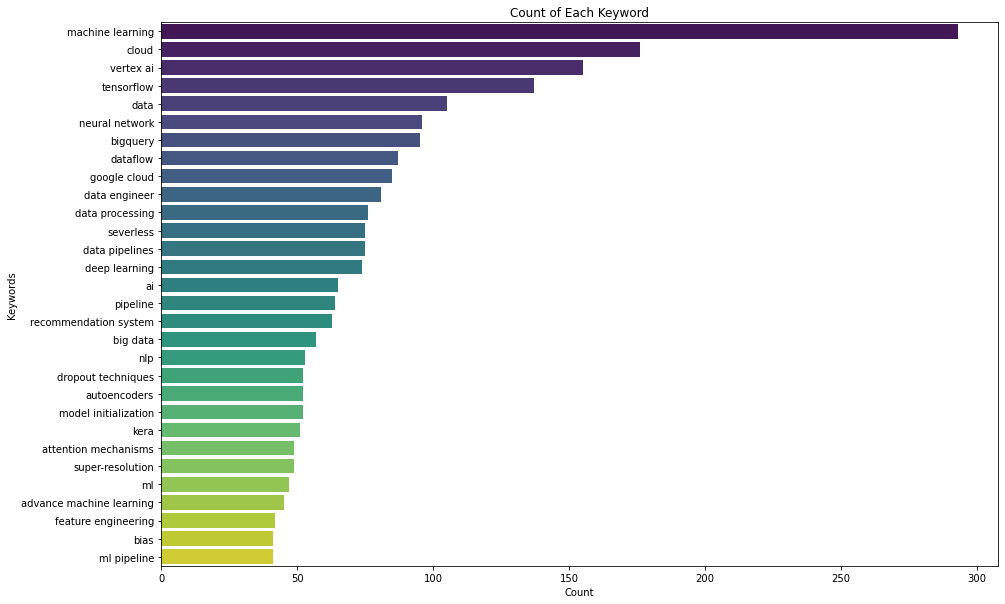

/Users/lorentzyeung/miniforge3/envs/nlp_kaggle/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/lorentzyeung/miniforge3/envs/nlp_kaggle/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



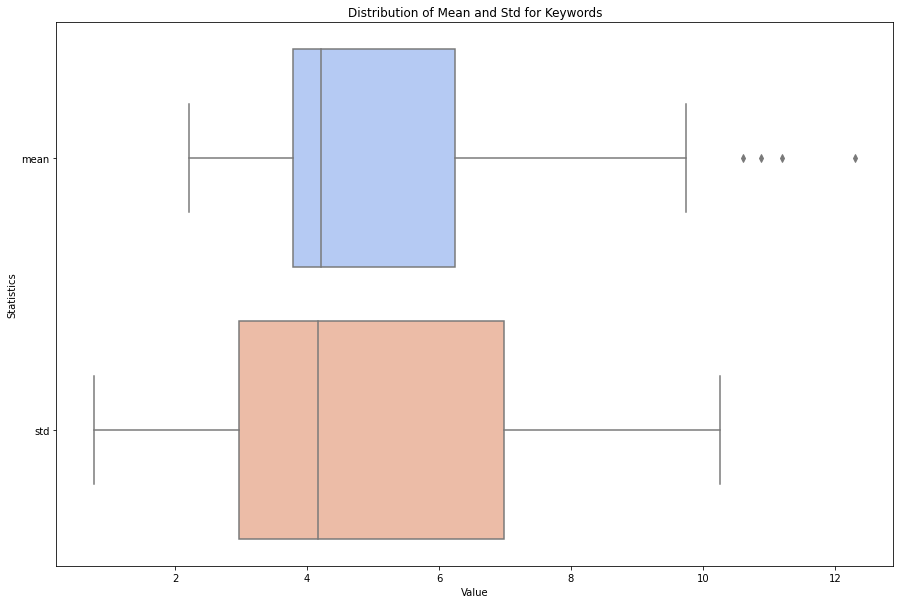

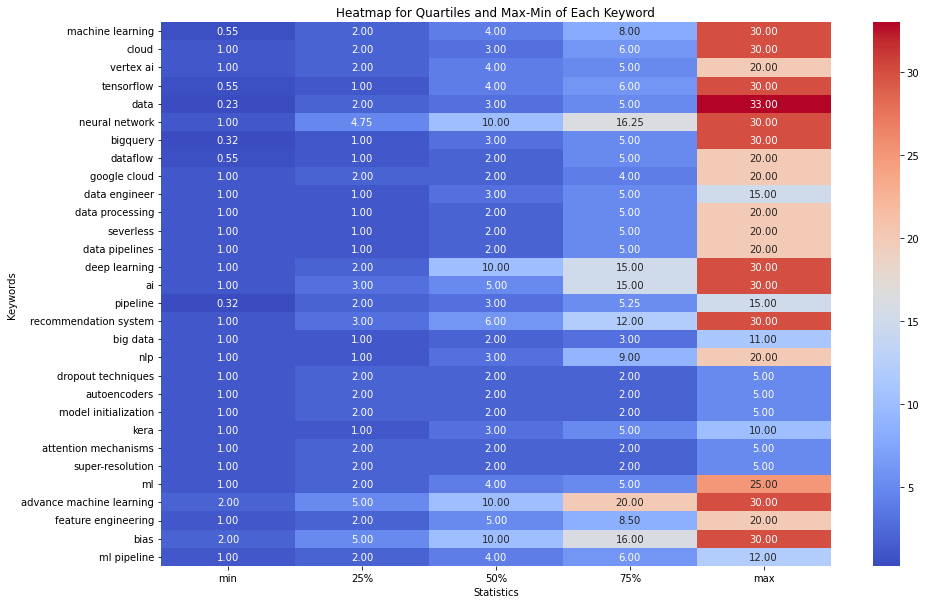

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for 'count' of each keyword
plt.figure(figsize=(15, 10))
sns.barplot(x='count', y=keyword_groupby.index, data=keyword_groupby, palette='viridis')
plt.title('Count of Each Keyword')
plt.xlabel('Count')
plt.ylabel('Keywords')
plt.show()

# Boxplot for 'mean' and 'std' of each keyword
plt.figure(figsize=(15, 10))
sns.boxplot(data=keyword_groupby[['mean', 'std']], orient='h', palette='coolwarm')
plt.title('Distribution of Mean and Std for Keywords')
plt.xlabel('Value')
plt.ylabel('Statistics')
plt.show()

# Heatmap for the quartiles and max-min of each keyword
plt.figure(figsize=(15, 10))
sns.heatmap(keyword_groupby[['min', '25%', '50%', '75%', 'max']], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap for Quartiles and Max-Min of Each Keyword')
plt.xlabel('Statistics')
plt.ylabel('Keywords')
plt.show()


In [72]:
keyword_groupby.index

Index(['machine learning', 'cloud', 'vertex ai', 'tensorflow', 'data',
       'neural network', 'bigquery', 'dataflow', 'google cloud',
       'data engineer', 'data processing', 'severless', 'data pipelines',
       'deep learning', 'ai', 'pipeline', 'recommendation system', 'big data',
       'nlp', 'dropout techniques', 'autoencoders', 'model initialization',
       'kera', 'attention mechanisms', 'super-resolution', 'ml',
       'advance machine learning', 'feature engineering', 'bias',
       'ml pipeline'],
      dtype='object', name='Keywords_lemmatized')

In [77]:
keyword_viz = keyword[keyword.Keywords_lemmatized.isin(keyword_groupby.index)]

In [80]:
# Create the box plot
fig = px.box(keyword_viz, x="Keywords_lemmatized", y="Duration_in_minutes", title="Box Plot of Duration in Minutes")
fig.show()

In [84]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Box(
    y=keyword_viz["Duration_in_minutes"],
    x=keyword_viz["Keywords_lemmatized"],
    name='Duration in Minutes',
    boxmean=True  # This shows the mean
))

fig.update_layout(
    title="Box Plot of Duration in Minutes",
    xaxis_title="Keywords",
    yaxis_title="Duration in Minutes"
)

fig.show()
